# Method: Linear Regression
This linear regression example uses the only the  feature of the physica_inactivity and diabetes, in order to illustrate a two-dimensional plot of this regression technique. The straight line shows how linear regression attempts
to draw a straight line that will best minimize the residual sum of square between the observed responses in the dataset and the responses predicted by the linear approximation. The coefficients, the residual sum of squares and the variance score are calculated.

## Selection:
The population is from the County Health Rankings (CHR) dataset, it contains data from the University of Wisconsin's County Health Rankings for the 50 US states for years 2015 and 2016.  

The CHR dataset only includes State and County level data. Population estimates for 2016 CHR data are based on 2014 Census population estimates, and 2015 CHR data are based on 2011 Census population estimates.

The County Health Rankings show that where you live matters to your health. The Rankings can mobilize community leaders and citizens to work together to build a culture of health.  This linear regression project serves as practical example to help communities to move from awarness to action.


<img src="Health Factor.png">


## Population Dataset:
The County Health Rankings ranks the health of nearly every county in every state.   For each county, there are two Rankings, one for Health Outcomes and one for Health Factors.  The health outcome is for how healthy a county currently is.  The Health factors is for how healthy a county might be in the future based on the many factors that influence health. I decided to investigate the health factor of physical inactivity in relation to diabetes diagnosis.  Goal is to predict the percentage of adults diagnosed with diabates using the given percetage of adults reporting no leisure-time physical activity. 

The population dataset contains 6382 records.

## Sample Dataset:
The sample dataset contains 2 records per state for year 2015 and 2016.  Initially 9 factors were identified. The sample dataset contains 100 records.  Final sample contains the factor with highest correlation.



## Raw Data Report:

**year**: 4-digit year value

**geo_name**: State 

** geo**: [location ID](Attribute API#geo) (State or County)

**physical_inactivity**: percentage of adults aged 20 and over reporting no leisure-time physical activity


**diabetes**: percentage of adults aged 20 and above with diagnosed diabetes

---

**File Type**: The raw data file is comman seperated value (CSV)


## Variables:

* **Explanatory**: Physical Inactivity (physical_inactivity)
   * The percentage of adults aged 20 and over reporting no leisure-time physical activity
             
* **Response**: Diabetes (diabetes)
   * The percentage of adults aged 20 and above with diagnosed diabetes
   
## Tools:
* sklearn.linear_model: contains methods intended for regression in which the target value is expected to be a linear combination of the input variable(s)
* matplotlib.pyplot:
* pandas: 

## API: 
https://api.datausa.io/api/csv/?show=geo&required=adult_smoking,adult_obesity,poor_physical_health_days,diabetic_screening,sexually_transmitted_infections,excessive_drinking,physical_inactivity,access_to_exercise_opportunities,food_environment_index,diabetes&sumlevel=allS

https://api.datausa.io/api/csv/?show=geo&required=adult_smoking,adult_obesity,poor_physical_health_days,diabetic_screening,sexually_transmitted_infections,excessive_drinking,physical_inactivity,access_to_exercise_opportunities,food_environment_index,diabetes&sumlevel=state
https://api.datausa.io/api/csv/?show=geo&required=physical_inactivity,diabetes&sumlevel=all

https://api.datausa.io/api/csv/?show=geo&required=physical_inactivity,diabetes&sumlevel=state

Source: https://github.com/DataUSA/datausa-api/wiki/Data%20API



Data Selection:

The goal is to predict the percentage of adults diagnosed with diabates in a state using the features given bellow.
* adult_smoking
* adult_obesity
* poor_physical_health_days
* diabetic_screening
* sexually_transmitted_infections
* excessive_drinking
* physical_inactivity
* access_to_exercise_opportunities
* food_environment_index

Steps:
* Import libraries
* Import dataset
* Explore dataset
* Fit a linear regression model
* Predict the percentage of adults diagnosed with diabetes using each independent variables
* Select the independent variable that best predict the target
* Predict the percentage of adults diagnosed with diabetes using **selected** independent variable

X = all the other features (or independent variables)

and

Y = percentage of adults diagnosed with diabetes (“target”)


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the population dataset
dataset = pd.read_csv('Data_Health_Factors.csv')

In [4]:
df = pd.DataFrame(dataset)
X = df.drop(['year', 'geo_name', 'geo', 'diabetes'], axis=1)
X

,adult_smoking,adult_obesity,poor_physical_health_days,diabetic_screening,sexually_transmitted_infections,excessive_drinking,physical_inactivity,access_to_exercise_opportunities,food_environment_index
0,0.211,0.336,4.6,0.85,611.0,0.133,0.293,0.628,6.6
1,0.219,0.332,4.3,0.84,635.0,0.122,0.294,0.641,6.7
2,0.199,0.284,3.4,0.76,789.4,0.217,0.203,0.670,7.3
3,0.208,0.283,3.5,0.76,746.7,0.192,0.201,0.793,7.4
4,0.166,0.239,3.5,0.79,464.6,0.161,0.204,0.858,6.9
5,0.165,0.235,3.9,0.80,466.4,0.166,0.206,0.858,6.8
6,0.224,0.329,4.1,0.83,563.3,0.126,0.305,0.658,6.2
7,0.247,0.333,4.7,0.83,523.8,0.143,0.315,0.613,6.1
8,0.129,0.229,3.7,0.81,440.8,0.172,0.168,0.934,7.5
9,0.128,0.225,4.0,0.81,439.9,0.172,0.167,0.935,7.7


In [5]:
X.keys()

Index(['adult_smoking', 'adult_obesity', 'poor_physical_health_days',
       'diabetic_screening', 'sexually_transmitted_infections',
       'excessive_drinking', 'physical_inactivity',
       'access_to_exercise_opportunities', 'food_environment_index'],
      dtype='object')

In [6]:
y = df['diabetes']

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
features_coef_df = pd.DataFrame(X.columns,columns=['Features']) 
features_coef_df['Estimated coefficients'] = pd.DataFrame(regressor.coef_)
features_coef_df

,Features,Estimated coefficients
0,adult_smoking,-0.011957
1,adult_obesity,0.076400
2,poor_physical_health_days,0.009672
3,diabetic_screening,0.061640
4,sexually_transmitted_infections,0.000019
5,excessive_drinking,-0.060376
6,physical_inactivity,0.189329
7,access_to_exercise_opportunities,0.032432
8,food_environment_index,-0.001915


In [16]:
regressor.score(X, y)

0.82942096211665517

Results show that there is a high correlation between physical_inactivity and diabetes.

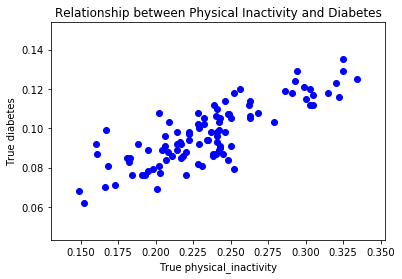

In [125]:
plt.scatter(dataset['physical_inactivity'], dataset['diabetes'], color = 'blue')
plt.title('Relationship between Physical Inactivity and Diabetes')
plt.xlabel('True physical_inactivity')
plt.ylabel('True diabetes')
plt.show()

Plot a scatter plot between True physical_inactivity and True diabetes.

In [126]:
# Importing the population dataset
dataset = pd.read_csv('Data.csv')

In [127]:
dataset.keys()

Index(['year', 'geo_name', 'geo', 'diabetes', 'physical_inactivity'], dtype='object')

In [128]:
dataset.shape

(6382, 5)

## Raw Population Data Report

In [129]:
dataset

,year,...,physical_inactivity
0,2016,...,0.293
1,2015,...,0.294
2,2015,...,0.201
3,2016,...,0.203
4,2015,...,0.204
5,2016,...,0.206
6,2015,...,0.305
7,2016,...,0.315
8,2016,...,0.167
9,2015,...,0.168


Table 1: 

Source: University of Wisconsin County Health Rankings (CHR) 

Site: http://www.countyhealthrankings.org

In [18]:
# Importing the sample dataset
dataset = pd.read_csv('Data_Health_Factors.csv')

In [19]:
dataset.keys()

Index(['year', 'geo_name', 'geo', 'adult_smoking', 'adult_obesity',
       'poor_physical_health_days', 'diabetic_screening',
       'sexually_transmitted_infections', 'excessive_drinking',
       'physical_inactivity', 'access_to_exercise_opportunities',
       'food_environment_index', 'diabetes'],
      dtype='object')

In [20]:
dataset.shape

(100, 13)

## Raw Sample Data Report

In [21]:
dataset

,year,geo_name,geo,adult_smoking,adult_obesity,poor_physical_health_days,diabetic_screening,sexually_transmitted_infections,excessive_drinking,physical_inactivity,access_to_exercise_opportunities,food_environment_index,diabetes
0,2016,Alabama,04000US01,0.211,0.336,4.6,0.85,611.0,0.133,0.293,0.628,6.6,0.124
1,2015,Alabama,04000US01,0.219,0.332,4.3,0.84,635.0,0.122,0.294,0.641,6.7,0.129
2,2016,Alaska,04000US02,0.199,0.284,3.4,0.76,789.4,0.217,0.203,0.670,7.3,0.077
3,2015,Alaska,04000US02,0.208,0.283,3.5,0.76,746.7,0.192,0.201,0.793,7.4,0.069
4,2015,Arizona,04000US04,0.166,0.239,3.5,0.79,464.6,0.161,0.204,0.858,6.9,0.089
5,2016,Arizona,04000US04,0.165,0.235,3.9,0.80,466.4,0.166,0.206,0.858,6.8,0.096
6,2015,Arkansas,04000US05,0.224,0.329,4.1,0.83,563.3,0.126,0.305,0.658,6.2,0.117
7,2016,Arkansas,04000US05,0.247,0.333,4.7,0.83,523.8,0.143,0.315,0.613,6.1,0.118
8,2015,California,04000US06,0.129,0.229,3.7,0.81,440.8,0.172,0.168,0.934,7.5,0.081
9,2016,California,04000US06,0.128,0.225,4.0,0.81,439.9,0.172,0.167,0.935,7.7,0.099


Table 2: 

Source: University of Wisconsin County Health Rankings (CHR) 

Site: http://www.countyhealthrankings.org

### Extract physical_inactivity and diabetes columns

In [23]:
new_df = dataset.drop(['year','geo_name','geo','adult_smoking','adult_obesity',
                       'poor_physical_health_days','diabetic_screening',
                       'sexually_transmitted_infections','excessive_drinking',
                       'access_to_exercise_opportunities','food_environment_index'], axis=1)

new_df

,physical_inactivity,diabetes
0,0.293,0.124
1,0.294,0.129
2,0.203,0.077
3,0.201,0.069
4,0.204,0.089
5,0.206,0.096
6,0.305,0.117
7,0.315,0.118
8,0.168,0.081
9,0.167,0.099


In [27]:
#Physical Inactivity Column
physical_inactivity = new_df.iloc[:, 0:1].values

In [28]:
#Diabetes Column
diabetes = new_df.iloc[:, 1:].values

### Splitting the dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(physical_inactivity, diabetes, test_size = 1/3, random_state = 0)

In [30]:
# Count of training data
X_train.shape

(66, 1)

In [31]:
# Count of test data
X_test.shape

(34, 1)

In [32]:
train_df = pd.DataFrame(X_train,columns=['physical_inactivity'])
train_df['Diabetes'] = pd.DataFrame(y_train)
train_df

,physical_inactivity,Diabetes
0,0.220,0.076
1,0.279,0.103
2,0.246,0.114
3,0.206,0.091
4,0.235,0.094
5,0.240,0.106
6,0.294,0.129
7,0.198,0.079
8,0.228,0.102
9,0.216,0.093


In [33]:
test_df = pd.DataFrame(X_test,columns=['physical_inactivity'])
test_df['Diabetes'] = pd.DataFrame(y_test)
test_df

,physical_inactivity,Diabetes
0,0.268,0.108
1,0.173,0.071
2,0.203,0.077
3,0.209,0.103
4,0.242,0.103
5,0.183,0.085
6,0.232,0.105
7,0.160,0.092
8,0.207,0.084
9,0.325,0.129


### Fitting Simple Linear Regression to the Training set

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Visualising the Training set results

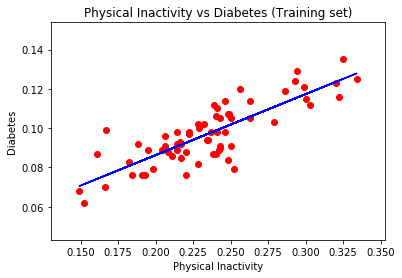

In [35]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Physical Inactivity vs Diabetes (Training set)')
plt.xlabel('Physical Inactivity')
plt.ylabel('Diabetes')
plt.show()

A scatterplot of the train dataset. The least-squares regression line is superimposed (blue line).

Here we can compare the percentage of adults adults aged 20 and above that reported no leisure-time physical activity with the percentage of adults aged 20 and above with diagnosed diabetes for all of the states in United States for 2015 and 2016.

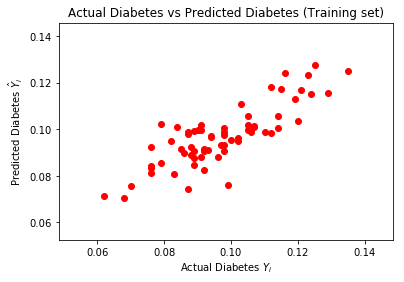

In [36]:
plt.scatter(y_train, regressor.predict(X_train), color = 'red')
plt.title('Actual Diabetes vs Predicted Diabetes (Training set)')
plt.xlabel('Actual Diabetes $Y_i$')
plt.ylabel('Predicted Diabetes $\hat{Y}_i$')
plt.show()

Scatter plot to compare actual Diabetes vs predicted Diabetes for the training dataset.

### Visualising the Test set results

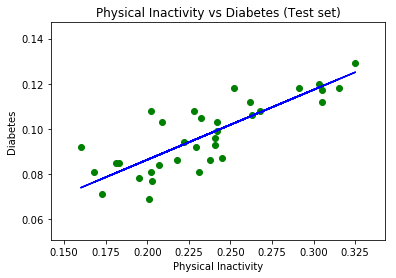

In [37]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Physical Inactivity vs Diabetes (Test set)')
plt.xlabel('Physical Inactivity')
plt.ylabel('Diabetes')
plt.show()

### Calculations: coefficient, intercept, mean squared error and variance score

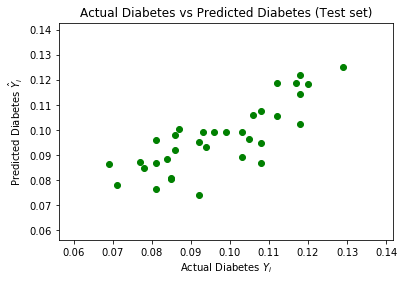

In [38]:
plt.scatter(y_test, regressor.predict(X_test), color = 'green')
plt.title('Actual Diabetes vs Predicted Diabetes (Test set)')
plt.xlabel('Actual Diabetes $Y_i$')
plt.ylabel('Predicted Diabetes $\hat{Y}_i$')
plt.show()

Scatter plot to compare actual Diabetes vs predicted Diabetes for the test dataset.

In [39]:
# The coefficient
print('Coefficient: ', regressor.coef_[0][0])
# The estimated intercept
print('Intercept: ', regressor.intercept_[0])

# The mean squared error
print("Mean squared error: %.10f"
      % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.10f' % regressor.score(X_test, y_test))

Coefficient:  0.3102523129
Intercept:  0.0242474266561
Mean squared error: 0.0000842648
Variance score: 0.6494780167


### Visualising the Residual Plot

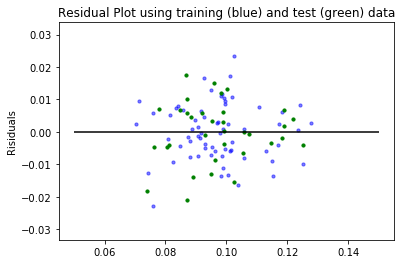

In [40]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, c='b', s=10, alpha=.5)
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c='g', s=10)
plt.hlines(y=0, xmin=0.05, xmax=.15)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Risiduals')
plt.show()

In [41]:
results = pd.DataFrame(y_train,columns=['Actual Diabetes'])
results['Predicted Diabetes'] = pd.DataFrame(regressor.predict(X_train))
results['Residual'] = pd.DataFrame(regressor.predict(X_train) - y_train)
results

,Actual Diabetes,Predicted Diabetes,Residual
0,0.076,0.092503,0.016503
1,0.103,0.110808,0.007808
2,0.114,0.100569,-0.013431
3,0.091,0.088159,-0.002841
4,0.094,0.097157,0.003157
5,0.106,0.098708,-0.007292
6,0.129,0.115462,-0.013538
7,0.079,0.085677,0.006677
8,0.102,0.094985,-0.007015
9,0.093,0.091262,-0.001738


# Conclusion: 

## Data Analysis Steps:

* Explore the County Health Rankings (CHR) dataset.
* Download data.
* Identify explanatory and response variables.
* Clean data (if necessary).
* Identify goal: Predict the percentage of adults diagnosed with diabates using the given the percetage of adults reporting no leisure-time physical activity.
* Create train-test split.
* Use Scikit learn to fit linear regression to the train dataset.
* Fit linear model.
* Plot train and test scatter plot and add linear regression line.
* Calculate the mean squared error for train and test data.
* Plot the residuals for train and test dataset.

## Summary: 

There is positive correlation between % physical inactivity and % of diabetes.  
States with adults that have higher percentage of physical inactivity have higher percentage of adults with diabetes.

<2017CSV_SAS_DatasetDocumentation>